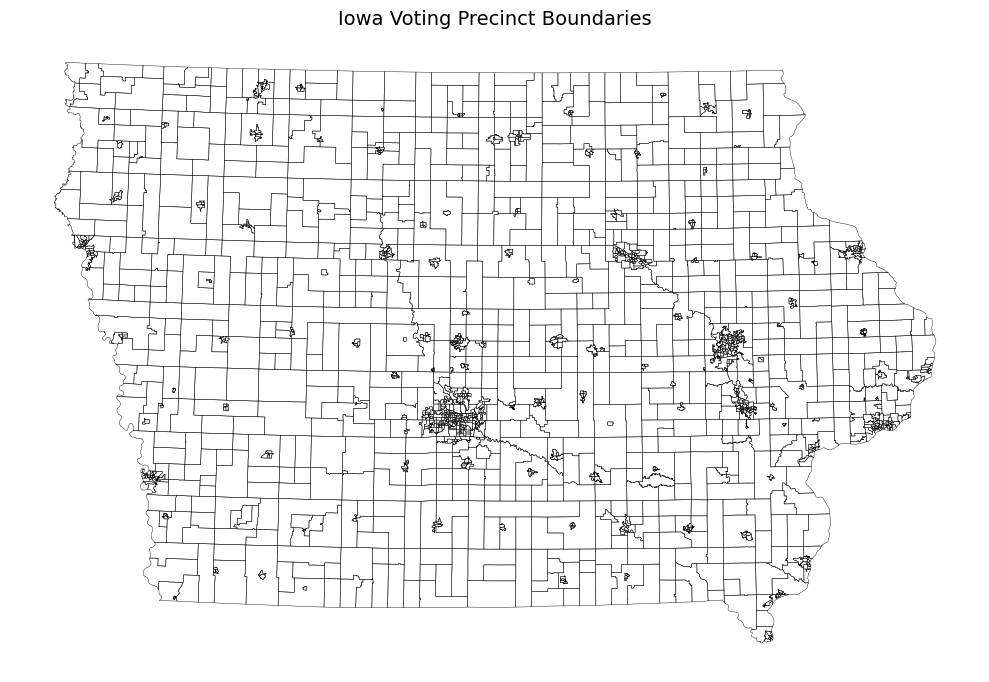

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------
# Load precinct shapefile
# -----------------------------
precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

# -----------------------------
# Reproject to a good CRS for Iowa
# -----------------------------
precincts = precincts.to_crs("EPSG:26915")  # NAD83 / UTM zone 15N

# -----------------------------
# Create map
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

precincts.plot(
    ax=ax,
    color="none",
    edgecolor="black",
    linewidth=0.3
)

# -----------------------------
# Styling
# -----------------------------
ax.set_title(
    "Iowa Voting Precinct Boundaries",
    fontsize=14
)
ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd

precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

print(precincts.columns)


Index(['OBJECTID_1', 'ID', 'AREA', 'DISTRICT', 'NAME', 'POPULATION',
       'House_Dist', 'Senate_Dis', 'Congressio', 'geometry'],
      dtype='object')


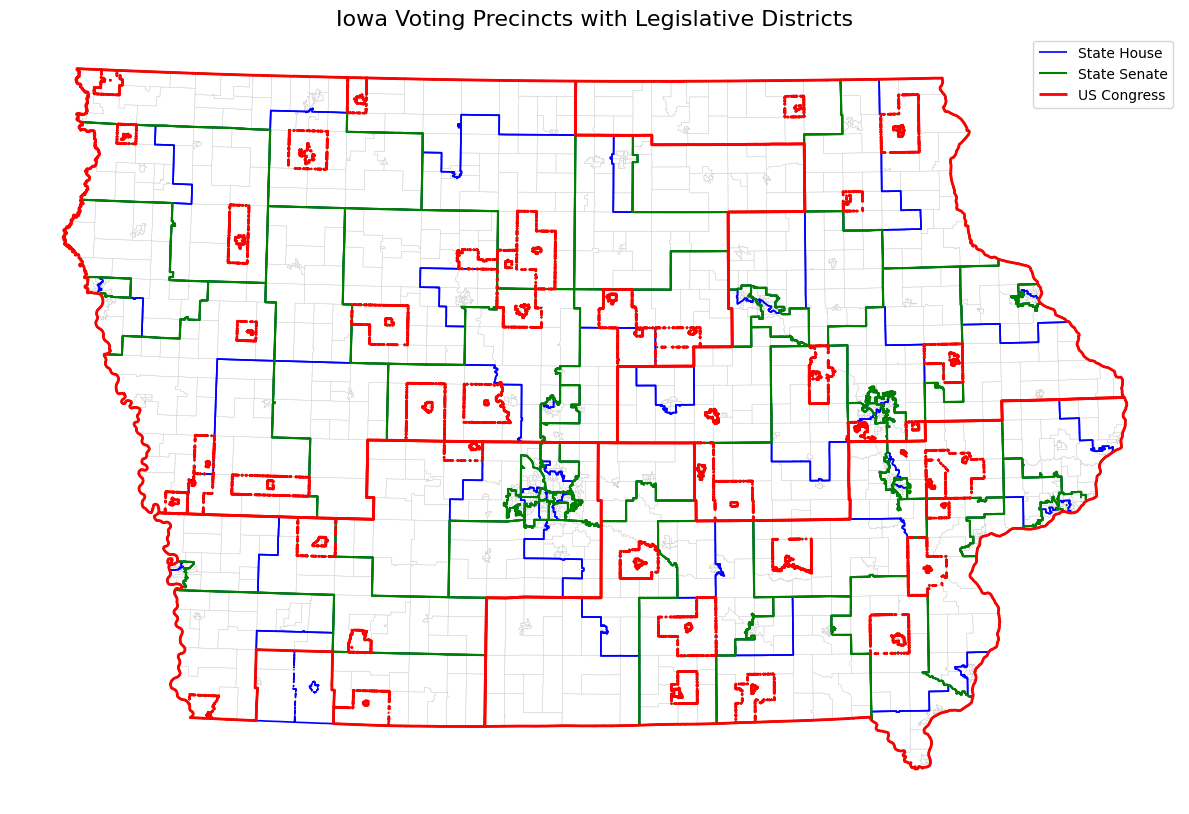

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------
# Load precinct shapefile
# -----------------------------
precincts = gpd.read_file(r"C:\Users\18607\OneDrive - University of Connecticut\26 Spring\DSDA 4815\iowa-map\Iowa_Precincts14\Precincts.shp")

# -----------------------------
# Reproject to a good CRS for Iowa
# -----------------------------
precincts = precincts.to_crs("EPSG:26915")  # NAD83 / UTM zone 15N

# -----------------------------
# Create figure and axes
# -----------------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# -----------------------------
# Plot precinct boundaries
# -----------------------------
precincts.plot(ax=ax, color="none", edgecolor="lightgrey", linewidth=0.3)

# -----------------------------
# Plot State House districts
# -----------------------------
precincts.dissolve(by="House_Dist").boundary.plot(
    ax=ax, edgecolor="blue", linewidth=1.2, label="State House"
)

# -----------------------------
# Plot State Senate districts
# -----------------------------
precincts.dissolve(by="Senate_Dis").boundary.plot(
    ax=ax, edgecolor="green", linewidth=1.5, label="State Senate"
)

# -----------------------------
# Plot US Congressional districts
# -----------------------------
precincts.dissolve(by="Congressio").boundary.plot(
    ax=ax, edgecolor="red", linewidth=2, label="US Congress"
)

# -----------------------------
# Styling
# -----------------------------
ax.set_title("Iowa Voting Precincts with Legislative Districts", fontsize=16)
ax.axis("off")
ax.legend()

plt.tight_layout()
plt.show()
